In [2]:
import pandas as pd
import glob

In [3]:
if glob.glob('../MiPace/data'):
    print('condition satisfied')

condition satisfied


In [4]:
files_visit1 = glob.glob('../MiPace/CPET/*/Visit_1/*cosmed*.csv')
files_visit2 = glob.glob('../MiPace/CPET/*/Visit_2/*cosmed*.csv')
files_visit3 = glob.glob('../MiPace/CPET/*/Visit_3/*cosmed*.csv')
len(files_visit1)

225

In [5]:
len(files_visit2)

214

In [6]:
len(files_visit3)

141

In [7]:
TR000208_cosmed_03242022_14_v1.csv

NameError: name 'TR000208_cosmed_03242022_14_v1' is not defined

In [8]:
TR000245/Visit_3/TR000245_cosmed_10132022_14_v1.csv

NameError: name 'TR000245' is not defined

In [9]:
df = pd.read_csv('/Users/joshuach100/Desktop/Performance Research Lab/MiPace/CPET/TR000245/Visit_3/TR000245_cosmed_10132022_14_v1.csv')

In [10]:
df

,ID1,Unnamed: 1,Unnamed: 2,Test date,10/13/2022,Unnamed: 5,Barometric Pressure (mmHg),731,Local time,t,...,mark Distance,Phase time,VO2/Kg%Pred,BR,VT/Ti,PaCO2_e,HRR,Dyspnea,SV e,CO e
0,Last Name,TR000245,NaN,Test Time,1:34:11 PM,NaN,Ambient Temperature (°C),21,NaN,s,...,m,hh:mm:ss,%,%,L/s,mmHg,bpm,---,mL,L/min
1,First Name,MiPACE,NaN,Subject Type,Healthy,NaN,Ambient Relative Humidity (%),38,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gender,Female,NaN,ECG Response,None,NaN,Temperature at Flowmeter (°C),34,13:34:11,00:00,...,0,00:00,20,87.1,0.7,33,NaN,NaN,NaN,NaN
3,Age,25.05475814,NaN,Reason for Test,None,NaN,Relative Humidity at Flowmeter (%),100,13:34:14,00:03,...,0,00:00,18,88.5,0.71,34,102,NaN,62.8,5.8
4,Height (cm),169.3,NaN,Reason for Stopping Test,None,NaN,STPD (---),0.7926,13:34:16,00:05,...,0,00:02,28,83.8,0.91,35,102,NaN,85.6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14:16:17,42:06,...,0,19:46,7,90.4,0.53,20,82,LEVEL_20,23.3,2.6
1175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14:16:20,42:09,...,0,19:49,5,91.1,0.48,17,84,LEVEL_20,17.1,1.9
1176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14:16:22,42:11,...,0,19:51,9,89.9,0.53,23,84,LEVEL_20,29.5,3.3
1177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14:16:28,42:17,...,0,19:57,15,85.2,1,27,86,LEVEL_20,46.4,5.1


In [11]:
#Columns regarding the last 30 seconds:
HR
#Booleans:
Grade
#Others
MaxSpeed, Amb. Temp., RH Amb, SV e, HR Max, Age, gender, height, weight, BMI

SyntaxError: invalid syntax (3021010828.py, line 6)

In [12]:
df_project = pd.DataFrame(columns=['id','visit','age','HR Max','gender','weight','height','bmi','Amb Temp','RH Humidity','Grade','avgHR last 30','MaxSpeed','avgRE','eSV','V02max'])

In [13]:
df_project

,id,visit,age,HR Max,gender,weight,height,bmi,Amb Temp,RH Humidity,Grade,avgHR last 30,MaxSpeed,avgRE,eSV,V02max


# Filter out the columns we want for calculating VO2MAX, eSV, avgRE, and MaxSpeed, avgHR

In [14]:
dfVO2 = df[['t','VO2/Kg','HR', 'Speed','Grade','Phase','SV e']]

In [15]:
dfVO2 = dfVO2.iloc[2:]

In [16]:
dfVO2

,t,VO2/Kg,HR,Speed,Grade,Phase,SV e
2,00:00,7.37,NaN,NaN,NaN,NONE,NaN
3,00:03,6.79,93,0,0,WARMUP,62.8
4,00:05,10.39,93,0,0,WARMUP,85.6
5,00:08,8.03,91,0,0,WARMUP,72.7
6,00:11,6.95,91,0,0,WARMUP,65.3
...,...,...,...,...,...,...,...
1174,42:06,2.63,113,0,0,RECOVERY,23.3
1175,42:09,1.84,111,0,0,RECOVERY,17.1
1176,42:11,3.37,111,0,0,RECOVERY,29.5
1177,42:17,5.66,109,0,0,RECOVERY,46.4


In [17]:
dfVO2 = dfVO2.dropna()

In [18]:
dfVO2.reset_index(inplace = True)

In [19]:
dfVO2

,index,t,VO2/Kg,HR,Speed,Grade,Phase,SV e
0,3,00:03,6.79,93,0,0,WARMUP,62.8
1,4,00:05,10.39,93,0,0,WARMUP,85.6
2,5,00:08,8.03,91,0,0,WARMUP,72.7
3,6,00:11,6.95,91,0,0,WARMUP,65.3
4,7,00:14,9.38,93,0,0,WARMUP,79.7
...,...,...,...,...,...,...,...,...
1171,1174,42:06,2.63,113,0,0,RECOVERY,23.3
1172,1175,42:09,1.84,111,0,0,RECOVERY,17.1
1173,1176,42:11,3.37,111,0,0,RECOVERY,29.5
1174,1177,42:17,5.66,109,0,0,RECOVERY,46.4


In [20]:
dfVO2 = dfVO2.drop(['index'], axis=1)

In [21]:
dfVO2

,t,VO2/Kg,HR,Speed,Grade,Phase,SV e
0,00:03,6.79,93,0,0,WARMUP,62.8
1,00:05,10.39,93,0,0,WARMUP,85.6
2,00:08,8.03,91,0,0,WARMUP,72.7
3,00:11,6.95,91,0,0,WARMUP,65.3
4,00:14,9.38,93,0,0,WARMUP,79.7
...,...,...,...,...,...,...,...
1171,42:06,2.63,113,0,0,RECOVERY,23.3
1172,42:09,1.84,111,0,0,RECOVERY,17.1
1173,42:11,3.37,111,0,0,RECOVERY,29.5
1174,42:17,5.66,109,0,0,RECOVERY,46.4


In [22]:
dfVO2['HR']

0        93
1        93
2        91
3        91
4        93
       ... 
1171    113
1172    111
1173    111
1174    109
1175    108
Name: HR, Length: 1176, dtype: object

In [23]:
#Transform column types to numeric values
dfVO2['SV e'] = pd.to_numeric(dfVO2['SV e'])
dfVO2['VO2/Kg'] = pd.to_numeric(dfVO2['VO2/Kg'])
dfVO2['Speed'] = pd.to_numeric(dfVO2['Speed'])
dfVO2['HR'] = pd.to_numeric(dfVO2['HR'])
dfVO2['Grade'] = pd.to_numeric(dfVO2['Grade'])

In [24]:
# dfVO2['t']= pd.to_datetime(dfVO2['t'])
dfVO2['t'] = pd.to_datetime(dfVO2['t'],format= '%M:%S' ).dt.time

In [25]:
# dfVO2['t'] = dfVO2['t'].apply(lambda x: int(x.strftime("%M%S")))

<AxesSubplot:xlabel='t'>

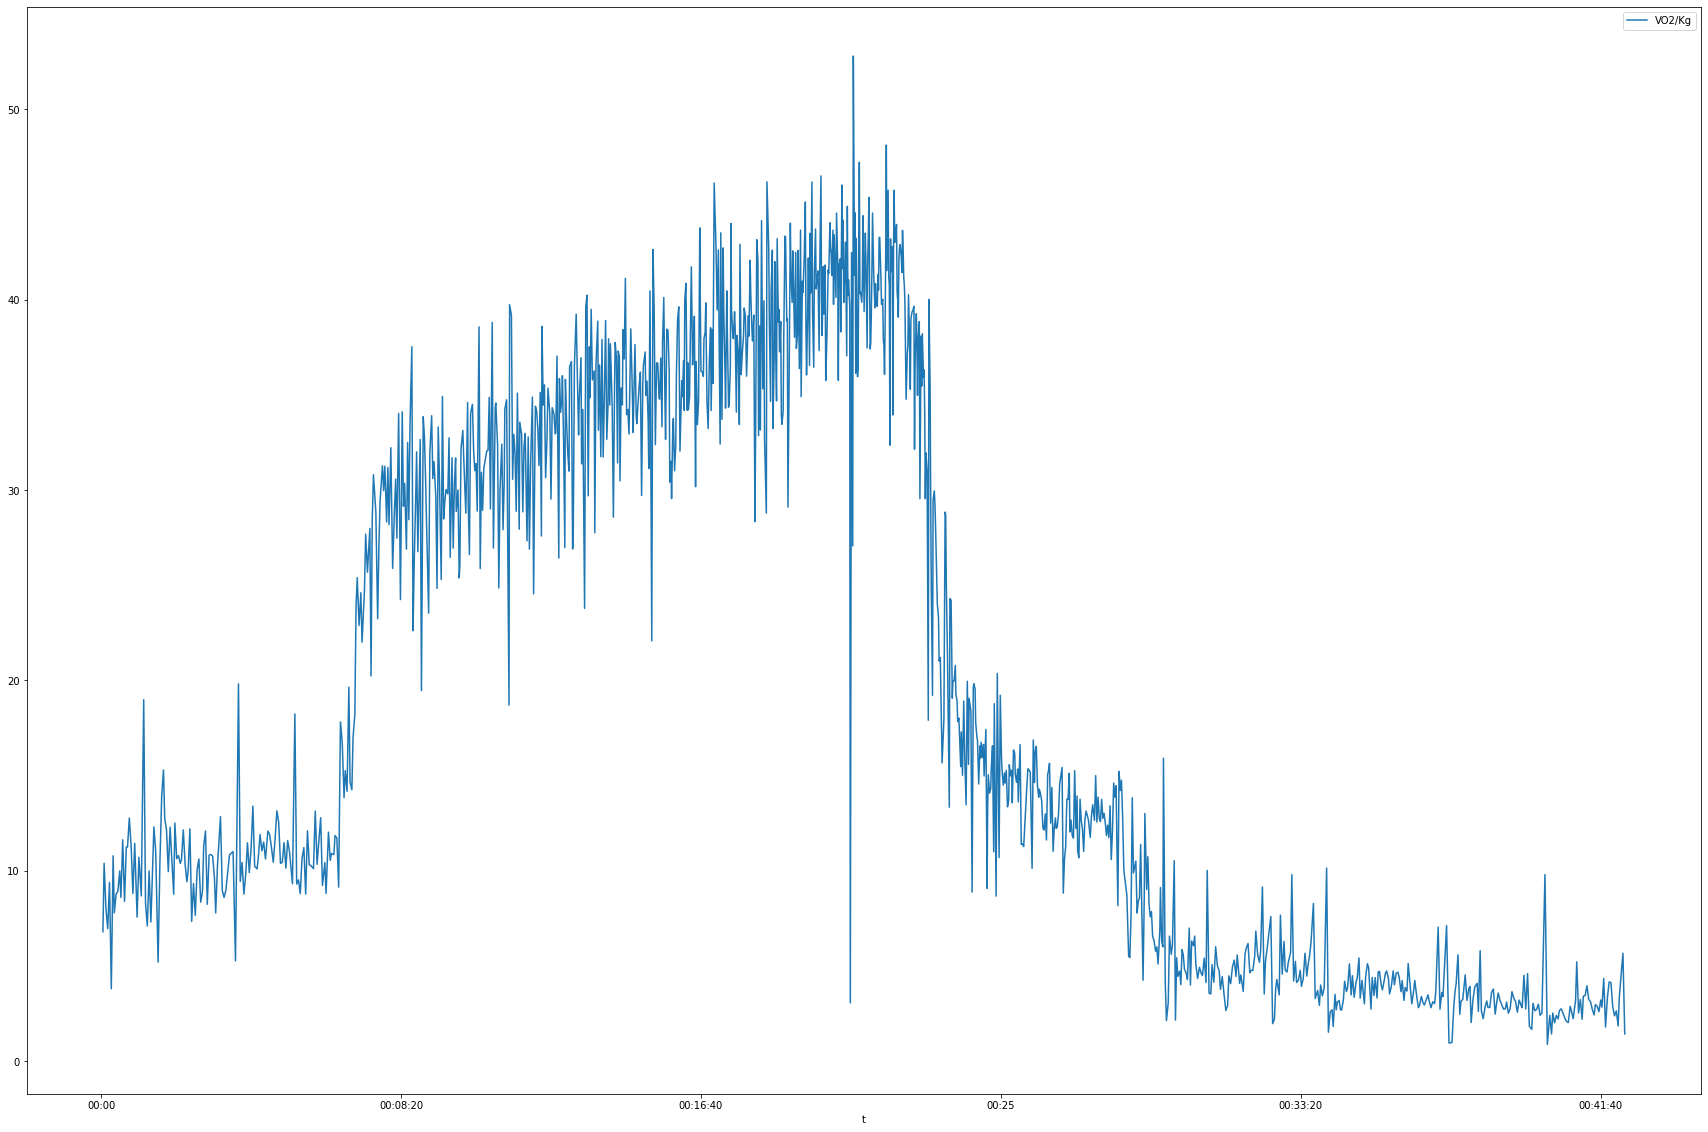

In [30]:
dfVO2.plot(x='t' , y = 'VO2/Kg', figsize=(30, 20))

In [27]:
# for i in dfVO2['t']:
#     print(type(i))

In [270]:
dfVO2['VO2/Kg']

0        6.79
1       10.39
2        8.03
3        6.95
4        9.38
        ...  
1171     2.63
1172     1.84
1173     3.37
1174     5.66
1175     1.42
Name: VO2/Kg, Length: 1176, dtype: float64

In [271]:
# import matplotlib.pyplot as plt
# # dfVO2['t'] = dfVO2['t'].astype(str)
# plt.scatter(dfVO2['t'], dfVO2['VO2/Kg'], s = 10, linewidth = 0)

In [272]:
# col = [] #empty list to hold colour value
# for i in range(1, len(dfVO2['VO2/Kg'])):
#     if dfVO2['VO2/Kg'][i] -  dfVO2['VO2/Kg'][i-1] >= 2.1:
#         col.append('orange')
#     else:
#         col.append('blue') 

In [273]:
# for i in range(len(dfVO2['VO2/Kg'])):
      
#     # plotting the corresponding x with y 
#     # and respective color
#     plt.scatter(dfVO2['t'][i], dfVO2['VO2/Kg'][i], c = col[i], s = 10,linewidth = 0)
       
# plt.show()

# Running Economy 

The last one minute of the average v02 for each stage 

In [274]:
dfVO2['Speed'].unique()

array([0. , 2. , 4.5, 5.1, 5.7, 6.3, 7. , 7.6])

In [275]:
dfVO2['Speed'].max()

7.6

In [276]:
dfVO2

,t,VO2/Kg,HR,Speed,Grade,Phase,SV e
0,00:00:03,6.79,93,0.0,0,WARMUP,62.8
1,00:00:05,10.39,93,0.0,0,WARMUP,85.6
2,00:00:08,8.03,91,0.0,0,WARMUP,72.7
3,00:00:11,6.95,91,0.0,0,WARMUP,65.3
4,00:00:14,9.38,93,0.0,0,WARMUP,79.7
...,...,...,...,...,...,...,...
1171,00:42:06,2.63,113,0.0,0,RECOVERY,23.3
1172,00:42:09,1.84,111,0.0,0,RECOVERY,17.1
1173,00:42:11,3.37,111,0.0,0,RECOVERY,29.5
1174,00:42:17,5.66,109,0.0,0,RECOVERY,46.4


In [277]:
def findIndexofLastExercise():
    for i in range(0, len(dfVO2['Phase'])):
        if dfVO2['Phase'][i] == 'RECOVERY':
            indextoreturn = i
            return indextoreturn 

In [278]:
findIndexofLastExercise()

663

In [279]:
dfVO2['Phase']

0         WARMUP
1         WARMUP
2         WARMUP
3         WARMUP
4         WARMUP
          ...   
1171    RECOVERY
1172    RECOVERY
1173    RECOVERY
1174    RECOVERY
1175    RECOVERY
Name: Phase, Length: 1176, dtype: object

In [280]:
def findIndexofStartExercise():
    for i in range(0, len(dfVO2['Phase'])):
        
        if dfVO2['Phase'][i] == 'EXERCISE':
            indextoreturn = i
            return indextoreturn 

In [281]:
findIndexofStartExercise()

128

In [282]:
# len(dfVO2['Speed'])

In [283]:
# dfVO2['Speed']

In [284]:
# listindex = []
# startindex = findIndexofStartExercise()
# endindex = findIndexofLastExercise()
# dfVO2['Speed'] = pd.to_numeric(dfVO2['Speed'])
# dfVO2['VO2/HR'] = pd.to_numeric(dfVO2['VO2/HR'])

# for i in range(startindex, endindex):
#         if (dfVO2['Speed'][i] != dfVO2['Speed'][i+1]):
#             listindex.append(i)
# listindex

In [285]:
# dfVO2['Speed'][findIndexofStartExercise()]

In [286]:
# findIndexofLastExercise()

In [287]:
def findEndOfSpeedIndex():
    endospeedlistindex = []
    startindex = findIndexofStartExercise()
    endindex = findIndexofLastExercise()
    dfVO2['Speed'] = pd.to_numeric(dfVO2['Speed'])
    #add the startindex
    for i in range(startindex, endindex):
            if (dfVO2['Speed'][i] != dfVO2['Speed'][i+1]):
                #Becuase in different protocols, when you hit a certain speed, the grades on the treadmill will also change. Need The protol 
                #here to figure how different groups change the grades 
                endospeedlistindex.append(i)
            if (dfVO2['Grade'][i] < dfVO2['Grade'][i+1]):
                endospeedlistindex.append(i)
    return endospeedlistindex

In [288]:
findEndOfSpeedIndex()

[200, 284, 380, 492, 621, 662]

In [289]:
#Original
# endospeedlistindex = []
# startindex = findIndexofStartExercise()
# endindex = findIndexofLastExercise()
# dfVO2['Speed'] = pd.to_numeric(dfVO2['Speed'])
# #add the startindex
# for i in range(startindex, endindex):
#         if (dfVO2['Speed'][i] < dfVO2['Speed'][i+1]):
#             #Becuase in different protocols, when you hit a certain speed, the grades on the treadmill will also change. Need The protol 
#             #here to figure how different groups change the grades 
#             endospeedlistindex.append(i)
# endospeedlistindex

In [290]:
speedlist_end = [dfVO2['Speed'][i] for i in findEndOfSpeedIndex()]
speedlist_end

[4.5, 5.1, 5.7, 6.3, 7.0, 7.6]

In [291]:
# result = zip(endospeedlistindex, speedlist_end )

In [292]:
# print(list(result))

In [293]:
# for i, s in zip(endospeedlistindex, speedlist_end):
#     print(f'Index: {i}')
#     print(f'Speed: {s}')

In [294]:
dfVO2['t']

0       00:00:03
1       00:00:05
2       00:00:08
3       00:00:11
4       00:00:14
          ...   
1171    00:42:06
1172    00:42:09
1173    00:42:11
1174    00:42:17
1175    00:42:20
Name: t, Length: 1176, dtype: object

In [295]:
def findIndexofOneMinStart(index: int):
    for i in range(index, -1, -1):
        if ((dfVO2['t'][index].minute * 60 + dfVO2['t'][index].second) - (dfVO2['t'][i].minute * 60 + dfVO2['t'][i].second)) > 60:
            #check the last stage of grade
            if dfVO2['Grade'][index] != dfVO2['Grade'][i]:
                for j in range(i,index+1):
                    if(dfVO2['Grade'][index] == dfVO2['Grade'][j]):
                        return j
            return i+1 

In [296]:
# def findIndexofOneMinStart(index: int):
#     for i in range(index, -1, -1):
#         if (int(dfVO2['t'][index].strftime("%H%M%S")) - int(dfVO2['t'][i].strftime("%H%M%S"))) > 100:
#             #check the last stage of grade
#             if dfVO2['Grade'][index] != dfVO2['Grade'][i]:
#                 for j in range(i,index+1):
#                     if(dfVO2['Grade'][index] == dfVO2['Grade'][j]):
#                         return j
#             return i+1    

In [297]:
def findIndexof30secStart(index: int):
    for i in range(index, -1, -1):
        if ((dfVO2['t'][index].minute * 60 + dfVO2['t'][index].second) - (dfVO2['t'][i].minute * 60 + dfVO2['t'][i].second)) > 30:
            #check the last stage of grade
            if dfVO2['Grade'][index] != dfVO2['Grade'][i]:
                for j in range(i,index+1):
                    if(dfVO2['Grade'][index] == dfVO2['Grade'][j]):
                        return j
            return i+1    

In [298]:
for i in findEndOfSpeedIndex():
    print(findIndexof30secStart(i))

187
269
364
474
597
635


In [299]:
findEndOfSpeedIndex()

[200, 284, 380, 492, 621, 662]

In [300]:
def calculateRunningEconomy():
    oneminstartlist = [] 
    V02meanlist = []
    for i in findEndOfSpeedIndex():
        V02sum = 0
        count = 0
        for j in range(findIndexofOneMinStart(i), i+1):
            V02sum += dfVO2['VO2/Kg'][j]
            count += 1
        V02meanlist.append(V02sum/count)
    return V02meanlist

In [301]:
from statistics import mean
mean(calculateRunningEconomy())

36.07038923869066

In [302]:
dfVO2

,t,VO2/Kg,HR,Speed,Grade,Phase,SV e
0,00:00:03,6.79,93,0.0,0,WARMUP,62.8
1,00:00:05,10.39,93,0.0,0,WARMUP,85.6
2,00:00:08,8.03,91,0.0,0,WARMUP,72.7
3,00:00:11,6.95,91,0.0,0,WARMUP,65.3
4,00:00:14,9.38,93,0.0,0,WARMUP,79.7
...,...,...,...,...,...,...,...
1171,00:42:06,2.63,113,0.0,0,RECOVERY,23.3
1172,00:42:09,1.84,111,0.0,0,RECOVERY,17.1
1173,00:42:11,3.37,111,0.0,0,RECOVERY,29.5
1174,00:42:17,5.66,109,0.0,0,RECOVERY,46.4


In [303]:
df[df['id']==123]

KeyError: 'id'

In [304]:
dfVO2_fast = dfVO2[dfVO2['Phase']=='EXERCISE']
dfVO2_fast.tail(39)

,t,VO2/Kg,HR,Speed,Grade,Phase,SV e
624,00:21:36,40.50,201,7.6,0,EXERCISE,80.9
625,00:21:37,43.25,201,7.6,0,EXERCISE,82.8
626,00:21:38,43.28,201,7.6,0,EXERCISE,82.8
627,00:21:40,41.16,201,7.6,0,EXERCISE,81.4
628,00:21:41,39.75,201,7.6,0,EXERCISE,80.4
629,00:21:43,40.02,201,7.6,0,EXERCISE,80.6
630,00:21:44,37.92,201,7.6,0,EXERCISE,79.0
631,00:21:45,37.55,202,7.6,0,EXERCISE,78.3
632,00:21:46,36.07,202,7.6,0,EXERCISE,77.1
633,00:21:47,38.72,202,7.6,0,EXERCISE,79.2


In [305]:
def calculateAttributesof30sec():
    oneminstartlist = [] 
    V02meanlist = []
    eSVlist = []
    HRmeanlist = []
    speedlist = []
    for i in findEndOfSpeedIndex():
        V02sum = 0
        eSVsum = 0
        HRsum = 0
        speedsum = 0
        count = 0
        for j in range(findIndexof30secStart(i), i+1):
            V02sum += dfVO2['VO2/Kg'][j]
            eSVsum += dfVO2['SV e'][j]
            HRsum += dfVO2['HR'][j]
            speedsum += dfVO2['Speed'][j]
            count += 1
        V02meanlist.append(V02sum/count)
        eSVlist.append(eSVsum/count)
        HRmeanlist.append(HRsum/count) 
        speedlist.append(speedsum/count)
    return (V02meanlist, eSVlist, HRmeanlist,speedlist)

In [306]:
calculateAttributesof30sec()

([29.859285714285715,
  33.258125,
  34.959999999999994,
  37.857368421052634,
  41.055200000000006,
  41.83035714285715],
 [90.90714285714286,
  88.97500000000001,
  84.96470588235293,
  83.5,
  81.8,
  83.24285714285713],
 [158.07142857142858,
  169.25,
  180.2941176470588,
  189.1578947368421,
  199.64,
  197.53571428571428],
 [4.5, 5.1, 5.700000000000002, 6.299999999999998, 7.0, 7.599999999999996])

In [307]:
calculateAttributesof30sec()[0][-1]

41.83035714285715

In [308]:
vo2max = max(calculateAttributesof30sec()[0][-1], calculateAttributesof30sec()[0][-2])
index = calculateAttributesof30sec()[0].index(vo2max)
eSV = calculateAttributesof30sec()[1][index]
meanHR = calculateAttributesof30sec()[2][index]
maxSPeed = calculateAttributesof30sec()[3][index]

In [309]:
df_project.columns

Index(['id', 'visit', 'age', 'HR Max', 'gender', 'weight', 'height', 'bmi',
       'Amb Temp', 'RH Humidity', 'Grade', 'avgHR last 30', 'MaxSpeed',
       'avgRE', 'eSV', 'V02max'],
      dtype='object')

In [310]:
if (dfVO2['Grade'] > 0).any() == False:
    grade = False
else:
    grade = True

In [311]:
df.head(15)

,ID1,Unnamed: 1,Unnamed: 2,Test date,10/13/2022,Unnamed: 5,Barometric Pressure (mmHg),731,Local time,t,Rf,VT,VE,IV,VO2,VCO2,RQ,O2exp,CO2exp,VE/VO2,VE/VCO2,VO2/Kg,METS,HR,VO2/HR,FeO2,FeCO2,FetO2,FetCO2,FiO2,FiCO2,PeO2,PeCO2,PetO2,PetCO2,Grade,Speed,Phase,Marker,Amb. Temp.,RH Amb,Analyz. Press.,PB,EEkc,EEh,EEm,EEtot,EEkg,PRO,Fat,CHO,PRO%,FAT%,CHO%,npRQ,La-,GPS Dist.,ST I,ST II,ST III,ST aVR,ST aVL,ST aVF,ST V1,ST V2,ST V3,ST V4,ST V5,ST V6,S I,S II,S III,S aVR,S aVL,S aVF,S V1,S V2,S V3,S V4,S V5,S V6,Ti,Te,Ttot,Ti/Ttot,VD/VT e,LogVE,t Rel,mark Speed,mark Distance,Phase time,VO2/Kg%Pred,BR,VT/Ti,PaCO2_e,HRR,Dyspnea,SV e,CO e
0,Last Name,TR000245,NaN,Test Time,1:34:11 PM,NaN,Ambient Temperature (°C),21,NaN,s,1/min,L(btps),L/min,mL,mL/min,mL/min,---,mL,mL,---,---,mL/min/Kg,---,bpm,mL/beat,%,%,%,%,%,%,mmHg,mmHg,mmHg,mmHg,%,Mph,---,---,°C,%,mmHg,mmHg,kcal/day,kcal/h,kcal/min,kcal,kcal/Kg/day,kcal/day,kcal/day,kcal/day,%,%,%,---,mmol/L,m,mm,mm,mm,mm,mm,mm,mm,mm,mm,mm,mm,mm,mV/s,mV/s,mV/s,mV/s,mV/s,mV/s,mV/s,mV/s,mV/s,mV/s,mV/s,mV/s,s,s,s,---,---,L/min,s,m/s,m,hh:mm:ss,%,%,L/s,mmHg,bpm,---,mL,L/min
1,First Name,MiPACE,NaN,Subject Type,Healthy,NaN,Ambient Relative Humidity (%),38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gender,Female,NaN,ECG Response,None,NaN,Temperature at Flowmeter (°C),34,13:34:11,00:00,21.82,0.847,18.48,600,469.9215284,401.0813979,0.85,146,24.3,36.1,42.3,7.37,2.1,NaN,NaN,17.24,2.87,15.55,4.45,20.35,0.13,118,20,106,30,NaN,NaN,NONE,NaN,21.5,38,617,731,3274,136.4,2.27,0,51.3,0,1637,1637,0,50,50,0.85,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.21,1.54,2.75,0.44,0.32,1.267,0,0,0,00:00,20,87.1,0.7,33,NaN,NaN,NaN,NaN
3,Age,25.05475814,NaN,Reason for Test,None,NaN,Relative Humidity at Flowmeter (%),100,13:34:14,00:03,19.54,0.842,16.456,600,433.4182699,356.0200603,0.82,145.4,24,34.8,42.4,6.79,1.9,93,4.7,17.27,2.85,15.38,4.61,20.47,0.12,118,19,105,32,0,0,WARMUP,NaN,21.5,38,617,731,2998,124.9,2.08,0,47,0,1827,1171,0,60.9,39.1,0.82,NaN,0,0.5,0.6,0.1,-0.5,0.2,0.4,-0.2,0,0.7,0.8,0.5,0.3,0.6,2,1.4,-1.3,-0.4,1.7,-0.8,-0.4,0.8,1.1,1,1.5,1.19,1.88,3.07,0.39,0.34,1.216,3,0,0,00:00,18,88.5,0.71,34,102,NaN,62.8,5.8
4,Height (cm),169.3,NaN,Reason for Stopping Test,None,NaN,STPD (---),0.7926,13:34:16,00:05,22.3,1.041,23.219,628,663.1940689,554.0169034,0.84,175.9,32.7,32.7,39.1,10.39,3,93,7.1,16.9,3.14,15.13,4.77,20.38,0.13,116,21,103,33,0,0,WARMUP,NaN,21.5,38,617,731,4602,191.8,3.2,0,72.1,0,2586,2016,0,56.2,43.8,0.84,NaN,0,0.5,0.6,0.1,-0.5,0.2,0.4,-0.2,0,0.7,0.8,0.5,0.3,0.6,2,1.4,-1.3,-0.4,1.7,-0.8,-0.4,0.8,1.1,1,1.5,1.14,1.55,2.69,0.42,0.32,1.366,2,0,0,00:02,28,83.8,0.91,35,102,NaN,85.6,8
5,Weight (kg),63.8,NaN,Test Purpose,None,NaN,BTPS Ins (---),1.116,13:34:19,00:08,19.87,0.976,19.391,802,511.9998057,425.5380488,0.83,168.2,28.3,35.2,42.3,8.03,2.3,91,5.6,17.23,2.9,15.61,4.28,20.45,0.13,118,20,107,29,0,0,WARMUP,NaN,21.5,38,617,731,3549,147.9,2.46,0,55.6,0,2046,1504,0,57.6,42.4,0.83,NaN,0,0.4,0.6,0.2,-0.5,0.1,0.4,-0.2,0,0.7,0.8,0.5,0.3,0.6,2,1.4,-1.3,-0.4,1.7,-0.9,-0.5,0.7,1,1,1.4,1.32,1.7,3.02,0.44,0.31,1.288,3,0,0,00:05,21,86.4,0.74,32,104,NaN,72.7,6.6
6,Y.O.B.,1997,NaN,Test Type,Maximal,NaN,BTPS Exp (---),1.0202,13:34:22,00:11,20.62,0.823,16.969,693,443.2380952,362.8957195,0.82,142.6,23.2,35,42.8,6.95,2,91,4.9,17.33,2.82,15.66,4.35,20.5,0.12,119,19,107,30,0,0,WARMUP,NaN,21.5,38,617,731,3064,127.7,2.13,0,48,0,1896,1168,0,61.9,38.1,0.82,NaN,0,0.4,0.6,0.2,-0.5,0.1,0.4,-0.2,0,0.7,0.8,0.5,0.3,0.6,2,1.4,-1.3,-0.4,1.7,-0.9,-0.5,0.7,1,1,1.4,1.27,1.64,2.91,0.44,0.32,1.23,3,0,0,00:08,19,88.1,0.65,32,104,NaN,65.3,5.9
7,Comments,NaN,NaN,Maximal Effort,Unconfirmed,NaN,#

In [312]:
df.iloc[1][7]

'38'

In [313]:
df2 = {'id': df.iloc[0][1], 'visit': 1, 'age': df.iloc[3][1], 'HR Max': df.iloc[10][7], 'gender':df.iloc[2][1], 
      'weight':df.iloc[5][1], 'height':df.iloc[4][1], 'bmi':df.iloc[9][7], 'Amb Temp':df.iloc[0][7], 
       'RH Humidity':df.iloc[1][7], 'Grade':grade, 'Grade':grade, 'avgHR last 30': meanHR, 
       'MaxSpeed': maxSPeed, 'avgRE': maxSPeed, 'eSV': eSV, 'V02max': vo2max}

In [314]:
df2

{'id': 'TR000245',
 'visit': 1,
 'age': '25.05475814',
 'HR Max': '195',
 'gender': 'Female',
 'weight': '63.8',
 'height': '169.3',
 'bmi': '22.3',
 'Amb Temp': '21',
 'RH Humidity': '38',
 'Grade': False,
 'avgHR last 30': 197.53571428571428,
 'MaxSpeed': 7.599999999999996,
 'avgRE': 7.599999999999996,
 'eSV': 83.24285714285713,
 'V02max': 41.83035714285715}

In [315]:
pd.set_option('max_columns', None)

In [316]:
df_project = df_project.append(df2, ignore_index = True)
df_project

,id,visit,age,HR Max,gender,weight,height,bmi,Amb Temp,RH Humidity,Grade,avgHR last 30,MaxSpeed,avgRE,eSV,V02max
0,TR000245,1,25.05475814,195,Female,63.8,169.3,22.3,21,38,False,197.535714,7.6,7.6,83.242857,41.830357


In [325]:
import os
errorfiles = 0
df_project = pd.DataFrame(columns=['id','visit','age','HR Max','gender','weight','height','bmi','Amb Temp','RH Humidity','Grade','avgHR last 30','MaxSpeed','avgRE','eSV','V02max'])
for file in files_visit1:
    df = pd.read_csv(file) 
    
    try:
        print(file)
        dfVO2 = df[['t','VO2/Kg','HR', 'Speed','Grade','Phase',"SV e"]]
        dfVO2 = dfVO2.iloc[2:]
        dfVO2 = dfVO2.dropna()
        dfVO2.reset_index(inplace = True)
        #Transform column types to numeric values
        dfVO2['SV e'] = pd.to_numeric(dfVO2['SV e'])
        dfVO2['VO2/Kg'] = pd.to_numeric(dfVO2['VO2/Kg'])
        dfVO2['Speed'] = pd.to_numeric(dfVO2['Speed'])
        dfVO2['HR'] = pd.to_numeric(dfVO2['HR'])
        dfVO2['Grade'] = pd.to_numeric(dfVO2['Grade'])
        dfVO2['t'] = pd.to_datetime(dfVO2['t'],format= '%M:%S' ).dt.time
        if (dfVO2['Grade'] > 0).any() == False:
            grade = False
        else:
            grade = True
        from statistics import mean
        avgRE = mean(calculateRunningEconomy())
        vo2max = max(calculateAttributesof30sec()[0][-1], calculateAttributesof30sec()[0][-2])
        index = calculateAttributesof30sec()[0].index(vo2max)
        eSV = calculateAttributesof30sec()[1][index]
        meanHR = calculateAttributesof30sec()[2][index]
        maxSPeed = calculateAttributesof30sec()[3][index]
    
        df2 = {'id': df.iloc[0][1], 'visit': 1, 'age': df.iloc[3][1], 'HR Max': df.iloc[10][7], 'gender':df.iloc[2][1], 
        'weight':df.iloc[5][1], 'height':df.iloc[4][1], 'bmi':df.iloc[9][7], 'Amb Temp':df.iloc[0][7], 
       'RH Humidity':df.iloc[1][7], 'Grade':grade, 'Grade':grade, 'avgHR last 30': meanHR, 
       'MaxSpeed': maxSPeed, 'avgRE': avgRE, 'eSV': eSV, 'V02max': vo2max}

        df_project = df_project.append(df2, ignore_index = True)
    except:
        errorfiles += 1
        print("There was an error file: ", file)
print("Error files in total: ", errorfiles)

../MiPace/CPET/TR000208/Visit_1/TR000208_cosmed_03242022_14_v1.csv
../MiPace/CPET/TR000237/Visit_1/TR000237_cosmed_04142022_14_v1.csv
../MiPace/CPET/TR000230/Visit_1/TR000230_cosmed_04082022_14_v1.csv
../MiPace/CPET/TR000239/Visit_1/TR000239_cosmed_04152022_11_v1.csv
../MiPace/CPET/TR000206/Visit_1/TR000206_cosmed_03232022_14_v1.csv
../MiPace/CPET/TR000201/Visit_1/TR000201_cosmed_03212022_14_v1.csv
../MiPace/CPET/TR000255/Visit_1/TR000255_cosmed_05232022_14_v1.csv
../MiPace/CPET/TR000252/Visit_1/TR000252_cosmed_05202022_14_v1.csv
../MiPace/CPET/TR000299/Visit_1/TR000299_cosmed_07152022_14_v1.csv
../MiPace/CPET/TR000264/Visit_1/TR000264_cosmed_06082022_11_v1.csv
../MiPace/CPET/TR000290/Visit_1/TR000290_cosmed_07072022_15_v1.csv
../MiPace/CPET/TR000297/Visit_1/TR000297_cosmed_07142022_14_v1.csv
../MiPace/CPET/TR000263/Visit_1/TR000263_cosmed_06082022_11_v1.csv
There was an error file:  ../MiPace/CPET/TR000263/Visit_1/TR000263_cosmed_06082022_11_v1.csv
../MiPace/CPET/TR000200/Visit_1/TR00

../MiPace/CPET/TR000215/Visit_1/TR000215_cosmed_03302022_14_v1.csv
../MiPace/CPET/TR000251/Visit_1/TR000251_cosmed_05202022_11_v1.csv
../MiPace/CPET/TR000256/Visit_1/TR000256_cosmed_05252022_11_v1.csv
../MiPace/CPET/TR000269/Visit_1/TR000269_cosmed_06142022_11_v1.csv
../MiPace/CPET/TR000294/Visit_1/TR000294_cosmed_07122022_10_v1.csv
../MiPace/CPET/TR000260/Visit_1/TR000260_cosmed_06012022_11_v1.csv
../MiPace/CPET/TR000267/Visit_1/TR000267_cosmed_06132022_14_v1.csv
../MiPace/CPET/TR000293/Visit_1/TR000293_cosmed_07082022_15_v1.csv
../MiPace/CPET/TR000258/Visit_1/TR000258_cosmed_05262022_14_v1.csv
../MiPace/CPET/TR000233/Visit_1/TR000233_cosmed_04212022_14_v1.csv
There was an error file:  ../MiPace/CPET/TR000233/Visit_1/TR000233_cosmed_04212022_14_v1.csv
../MiPace/CPET/TR000233/Visit_1/TR000233_cosmed_04112022_14_v1.csv
There was an error file:  ../MiPace/CPET/TR000233/Visit_1/TR000233_cosmed_04112022_14_v1.csv
../MiPace/CPET/TR000234/Visit_1/TR000234_cosmed_04212022_11_v1.csv
There was 

../MiPace/CPET/TR000280/Visit_1/TR000280_cosmed_06292022_11_v1.csv
../MiPace/CPET/TR000274/Visit_1/TR000274_cosmed_06202022_14_v1.csv
../MiPace/CPET/TR000273/Visit_1/TR000273_cosmed_06162022_14_v1.csv
../MiPace/CPET/TR000287/Visit_1/TR000287_cosmed_07012022_14_v1.csv
Error files in total:  19


In [318]:
df_project

,id,visit,age,HR Max,gender,weight,height,bmi,Amb Temp,RH Humidity,Grade,avgHR last 30,MaxSpeed,avgRE,eSV,V02max
0,TR000208,1,53.35659185,167,Male,93.4,181,28.5,22,35,True,169.190476,7.6,35.332062,147.395238,43.019048
1,TR000237,1,37.37028139,183,Male,83.3,184.3,24.5,24,35,False,177.259259,8.6,45.988394,152.159259,51.665185
2,TR000230,1,28.3757572,192,Male,92.7,196.7,24,22,32,True,186.928571,9.3,45.597972,167.592857,54.454286
3,TR000239,1,34.01368954,186,Female,59.1,167.8,21,22,28,True,174.424242,9.3,43.836381,111.990909,53.472121
4,TR000206,1,60.16427442,160,Female,43,158.5,17.1,22,36,False,162.846154,9.3,53.696826,96.223077,58.255385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,TR000242,1,41.46337023,179,Female,61,155.5,25.2,21,29,False,190.074074,6.4,28.973434,69.755556,35.187778
202,TR000280,1,27.73716093,193,Female,53.2,163,20,24,39,True,183.166667,9.3,40.318691,92.966667,50.557500
203,TR000274,1,34.56467279,186,Male,74.9,182.5,22.5,25,43,False,179.416667,11.0,52.085264,153.400000,59.709583
204,TR000273,1,33.10951628,187,Female,61.6,166.5,22.2,25,41,False,170.421053,7.6,36.139874,99.000000,43.252105


In [326]:
for file in files_visit2:
    df = pd.read_csv(file) 
    
    try:
        print(file)
        dfVO2 = df[['t','VO2/Kg','HR', 'Speed','Grade','Phase',"SV e"]]
        dfVO2 = dfVO2.iloc[2:]
        dfVO2 = dfVO2.dropna()
        dfVO2.reset_index(inplace = True)
        #Transform column types to numeric values
        dfVO2['SV e'] = pd.to_numeric(dfVO2['SV e'])
        dfVO2['VO2/Kg'] = pd.to_numeric(dfVO2['VO2/Kg'])
        dfVO2['Speed'] = pd.to_numeric(dfVO2['Speed'])
        dfVO2['HR'] = pd.to_numeric(dfVO2['HR'])
        dfVO2['Grade'] = pd.to_numeric(dfVO2['Grade'])
        dfVO2['t'] = pd.to_datetime(dfVO2['t'],format= '%M:%S' ).dt.time
        if (dfVO2['Grade'] > 0).any() == False:
            grade = False
        else:
            grade = True
        from statistics import mean
        avgRE = mean(calculateRunningEconomy())
        vo2max = max(calculateAttributesof30sec()[0][-1], calculateAttributesof30sec()[0][-2])
        index = calculateAttributesof30sec()[0].index(vo2max)
        eSV = calculateAttributesof30sec()[1][index]
        meanHR = calculateAttributesof30sec()[2][index]
        maxSPeed = calculateAttributesof30sec()[3][index]
        
        if(df.iloc[0][1] == '170'):
            print("this is: ", file)
    
        df2 = {'id': df.iloc[0][1], 'visit': 2, 'age': df.iloc[3][1], 'HR Max': df.iloc[10][7], 'gender':df.iloc[2][1], 
        'weight':df.iloc[5][1], 'height':df.iloc[4][1], 'bmi':df.iloc[9][7], 'Amb Temp':df.iloc[0][7], 
       'RH Humidity':df.iloc[1][7], 'Grade':grade, 'Grade':grade, 'avgHR last 30': meanHR, 
       'MaxSpeed': maxSPeed, 'avgRE': maxSPeed, 'eSV': eSV, 'V02max': vo2max}

        df_project = df_project.append(df2, ignore_index = True)
    except:
        errorfiles += 1
        print("There was an error file: ", file)
print("Error files in total: ", errorfiles)

../MiPace/CPET/TR000208/Visit_2/TR000208_cosmed_05132022_14_v1.csv
../MiPace/CPET/TR000230/Visit_2/TR000230_cosmed_07152022_14_v1.csv
../MiPace/CPET/TR000239/Visit_2/TR000239_cosmed_08122022_10_v1.csv
../MiPace/CPET/TR000206/Visit_2/TR000206_cosmed_08172022_14_v1.csv
../MiPace/CPET/TR000201/Visit_2/TR000201_cosmed_05092022_14_v1.csv
../MiPace/CPET/TR000255/Visit_2/TR000255_cosmed_10282022_14_v1.csv
../MiPace/CPET/TR000252/Visit_2/TR000252_cosmed_07222022_13_v1.csv
../MiPace/CPET/TR000299/Visit_2/TR000299_cosmed_09232022_14_v1.csv
../MiPace/CPET/TR000264/Visit_2/TR000264_cosmed_09202022_11_v1.csv
../MiPace/CPET/TR000290/Visit_2/TR000290_cosmed_08312022_14_v1.csv
There was an error file:  ../MiPace/CPET/TR000290/Visit_2/TR000290_cosmed_08312022_14_v1.csv
../MiPace/CPET/TR000263/Visit_2/TR000263_cosmed_08312022_10_v1.csv
../MiPace/CPET/TR000200/Visit_2/TR000200_cosmed_06272022_14_v1.csv
../MiPace/CPET/TR000238/Visit_2/TR000238_cosmed_07292022_10_v1.csv
../MiPace/CPET/TR000207/Visit_2/TR00

../MiPace/CPET/TR000260/Visit_2/TR000260_cosmed_08102022_10_v1.csv
../MiPace/CPET/TR000267/Visit_2/TR000267_cosmed_08252022_14_v1.csv
../MiPace/CPET/TR000293/Visit_2/TR000293_cosmed_09162022_14_v1.csv
../MiPace/CPET/TR000258/Visit_2/TR000258_cosmed_08122022_14_v1.csv
../MiPace/CPET/TR000233/Visit_2/TR000233_cosmed_05252022_14_v1.csv
../MiPace/CPET/TR000202/Visit_2/TR000202_cosmed_08012022_14_v1.csv
../MiPace/CPET/TR000205/Visit_2/TR000205_cosmed_06242022_14_v1.csv
../MiPace/CPET/TR000292/Visit_2/TR000292_cosmed_09122022_14_v1.csv
../MiPace/CPET/TR000266/Visit_2/TR000266_cosmed_08192022_14_v1.csv
../MiPace/CPET/TR000259/Visit_2/TR000259_cosmed_08222022_10_v1.csv
../MiPace/CPET/TR000295/Visit_2/TR000295_cosmed_09212022_10_v1.csv
../MiPace/CPET/TR000257/Visit_2/TR000257_cosmed_08192022_14_v1.csv
../MiPace/CPET/TR000268/Visit_2/TR000268_cosmed_08302022_10_v1.csv
../MiPace/CPET/TR000250/Visit_2/TR000250_cosmed_07282022_10_v1.csv
../MiPace/CPET/TR000204/Visit_2/TR000204_cosmed_06062022_11_v1

In [328]:
for file in files_visit3:
    df = pd.read_csv(file) 
    
    try:
        print(file)
        dfVO2 = df[['t','VO2/Kg','HR', 'Speed','Grade','Phase',"SV e"]]
        dfVO2 = dfVO2.iloc[2:]
        dfVO2 = dfVO2.dropna()
        dfVO2.reset_index(inplace = True)
        #Transform column types to numeric values
        dfVO2['SV e'] = pd.to_numeric(dfVO2['SV e'])
        dfVO2['VO2/Kg'] = pd.to_numeric(dfVO2['VO2/Kg'])
        dfVO2['Speed'] = pd.to_numeric(dfVO2['Speed'])
        dfVO2['HR'] = pd.to_numeric(dfVO2['HR'])
        dfVO2['Grade'] = pd.to_numeric(dfVO2['Grade'])
        dfVO2['t'] = pd.to_datetime(dfVO2['t'],format= '%M:%S' ).dt.time
        if (dfVO2['Grade'] > 0).any() == False:
            grade = False
        else:
            grade = True
        from statistics import mean
        avgRE = mean(calculateRunningEconomy())
        vo2max = max(calculateAttributesof30sec()[0][-1], calculateAttributesof30sec()[0][-2])
        index = calculateAttributesof30sec()[0].index(vo2max)
        eSV = calculateAttributesof30sec()[1][index]
        meanHR = calculateAttributesof30sec()[2][index]
        maxSPeed = calculateAttributesof30sec()[3][index]
    
        df2 = {'id': df.iloc[0][1], 'visit': 3, 'age': df.iloc[3][1], 'HR Max': df.iloc[10][7], 'gender':df.iloc[2][1], 
        'weight':df.iloc[5][1], 'height':df.iloc[4][1], 'bmi':df.iloc[9][7], 'Amb Temp':df.iloc[0][7], 
       'RH Humidity':df.iloc[1][7], 'Grade':grade, 'Grade':grade, 'avgHR last 30': meanHR, 
       'MaxSpeed': maxSPeed, 'avgRE': maxSPeed, 'eSV': eSV, 'V02max': vo2max}

        df_project = df_project.append(df2, ignore_index = True)
    except:
        errorfiles += 1
        print("There was an error file: ", file)
print("Error files in total: ", errorfiles)

../MiPace/CPET/TR000208/Visit_3/TR000208_cosmed_08182022_14_v1.csv
../MiPace/CPET/TR000230/Visit_3/TR000230_cosmed_11042022_14_v1.csv
../MiPace/CPET/TR000239/Visit_3/TR000239_cosmed_11292022_10_v1.csv
../MiPace/CPET/TR000201/Visit_3/TR000201_cosmed_08162022_14_v1.csv
../MiPace/CPET/TR000252/Visit_3/TR000252_cosmed_10282022_14_v1.csv
../MiPace/CPET/TR000200/Visit_3/TR000200_cosmed_10202022_14_v1.csv
../MiPace/CPET/TR000238/Visit_3/TR000238_cosmed_11182022_10_v1.csv
../MiPace/CPET/TR000207/Visit_3/TR000207_cosmed_12012022_10_v1.csv
../MiPace/CPET/TR000209/Visit_3/TR000209_cosmed_12012022_14_v1.csv
../MiPace/CPET/TR000262/Visit_3/TR000262_cosmed_11182022_10_v1.csv
../MiPace/CPET/TR000253/Visit_3/TR000253_cosmed_11072022_10_v1.csv
../MiPace/CPET/TR000254/Visit_3/TR000254_cosmed_11152022_14_v1.csv
../MiPace/CPET/TR000114/Visit_3/TR000114_cosmed_09022022_14_v1.csv
../MiPace/CPET/TR000113/Visit_3/TR000113_cosmed_09092022_10_v1.csv
../MiPace/CPET/TR000125/Visit_3/TR000125_cosmed_09262022_14_v1

../MiPace/CPET/TR000135/Visit_3/TR000135_cosmed_08082022_10_v1.csv
../MiPace/CPET/TR000132/Visit_3/TR000132_cosmed_09132022_14_v1.csv
../MiPace/CPET/TR000159/Visit_3/TR000159_cosmed_11172022_14_v1.csv
../MiPace/CPET/TR000166/Visit_3/TR000166_cosmed_11082022_14_v1.csv
../MiPace/CPET/TR000192/Visit_3/TR000192_cosmed_08192022_15_v1.csv
../MiPace/CPET/TR000195/Visit_3/TR000195_cosmed_10242022_14_v1.csv
../MiPace/CPET/TR000161/Visit_3/TR000161_cosmed_08112022_12_v1.csv
../MiPace/CPET/TR000168/Visit_3/TR000168_cosmed_10242022_14_v1.csv
../MiPace/CPET/TR000157/Visit_3/TR000157_cosmed_09292022_10_v1.csv
../MiPace/CPET/TR000150/Visit_3/TR000150_cosmed_09092022_14_v1.csv
../MiPace/CPET/TR000210/Visit_3/TR000210_cosmed_10032022_10_v1.csv
../MiPace/CPET/TR000221/Visit_3/TR000221_cosmed_11072022_14_v1.csv
../MiPace/CPET/TR000226/Visit_3/TR000226_cosmed_11082022_10_v1.csv
../MiPace/CPET/TR000219/Visit_3/TR000219_cosmed_12012022_10_v1.csv
../MiPace/CPET/TR000227/Visit_3/TR000227_cosmed_10062022_10_v1

In [329]:
df_project

,id,visit,age,HR Max,gender,weight,height,bmi,Amb Temp,RH Humidity,Grade,avgHR last 30,MaxSpeed,avgRE,eSV,V02max
0,TR000208,1,53.35659185,167,Male,93.4,181,28.5,22,35,True,169.190476,7.6,35.332062,147.395238,43.019048
1,TR000237,1,37.37028139,183,Male,83.3,184.3,24.5,24,35,False,177.259259,8.6,45.988394,152.159259,51.665185
2,TR000230,1,28.3757572,192,Male,92.7,196.7,24,22,32,True,186.928571,9.3,45.597972,167.592857,54.454286
3,TR000239,1,34.01368954,186,Female,59.1,167.8,21,22,28,True,174.424242,9.3,43.836381,111.990909,53.472121
4,TR000206,1,60.16427442,160,Female,43,158.5,17.1,22,36,False,162.846154,9.3,53.696826,96.223077,58.255385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,TR000216,3,61.07392349,159,Female,59.9,166.3,21.7,22,46,True,173.285714,6.4,6.400000,87.346429,41.293929
539,TR000211,3,56.10677837,165,Male,68.4,174.5,22.5,24,44,True,178.500000,8.3,8.300000,141.804167,60.182917
540,TR000245,3,25.05475814,195,Female,63.8,169.3,22.3,21,38,False,197.535714,7.6,7.600000,83.242857,41.830357
541,TR000242,3,41.9616693,179,Female,61.4,156.2,25.2,21,30,True,171.961538,6.4,6.400000,75.815385,34.885000


In [331]:
def slicing(string):
    return string[:8]
df_project['id'] = df_project['id'].apply(lambda x: slicing(x))
df_project.drop_duplicates(inplace = True)
df_project

,id,visit,age,HR Max,gender,weight,height,bmi,Amb Temp,RH Humidity,Grade,avgHR last 30,MaxSpeed,avgRE,eSV,V02max
0,TR000208,1,53.35659185,167,Male,93.4,181,28.5,22,35,True,169.190476,7.6,35.332062,147.395238,43.019048
1,TR000237,1,37.37028139,183,Male,83.3,184.3,24.5,24,35,False,177.259259,8.6,45.988394,152.159259,51.665185
2,TR000230,1,28.3757572,192,Male,92.7,196.7,24,22,32,True,186.928571,9.3,45.597972,167.592857,54.454286
3,TR000239,1,34.01368954,186,Female,59.1,167.8,21,22,28,True,174.424242,9.3,43.836381,111.990909,53.472121
4,TR000206,1,60.16427442,160,Female,43,158.5,17.1,22,36,False,162.846154,9.3,53.696826,96.223077,58.255385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,TR000216,3,61.07392349,159,Female,59.9,166.3,21.7,22,46,True,173.285714,6.4,6.400000,87.346429,41.293929
539,TR000211,3,56.10677837,165,Male,68.4,174.5,22.5,24,44,True,178.500000,8.3,8.300000,141.804167,60.182917
540,TR000245,3,25.05475814,195,Female,63.8,169.3,22.3,21,38,False,197.535714,7.6,7.600000,83.242857,41.830357
541,TR000242,3,41.9616693,179,Female,61.4,156.2,25.2,21,30,True,171.961538,6.4,6.400000,75.815385,34.885000


# EDA

In [174]:
df_project.to_csv('mipace_mlproject.csv')  

In [242]:
df_project

,id,visit,age,HR Max,gender,weight,height,bmi,Amb Temp,RH Humidity,Grade,avgHR last 30,MaxSpeed,avgRE,eSV,V02max


In [322]:
df_project.sort_values(by=['id'])

,id,visit,age,HR Max,gender,weight,height,bmi,Amb Temp,RH Humidity,Grade,avgHR last 30,MaxSpeed,avgRE,eSV,V02max
251,170,2,30.8056086,190,Male,67.4,180.7,20.6,24,31,False,160.192308,9.8,9.800000,142.796154,55.033077
73,TR000100,1,37.93429023,183,Female,52.1,159.9,20.4,21,27,True,188.500000,9.8,53.986906,98.787500,59.314167
273,TR000100,2,38.08761302,182,Female,51.2,160.1,20,22,40,False,183.647059,9.2,9.200000,112.605882,64.440588
272,TR000100 V2,2,38.08761302,182,Female,51.2,160.1,20,22,40,False,183.647059,9.2,9.200000,112.605882,64.440588
454,TR000100 V2,3,38.31759721,182,Female,51.7,160.2,20.1,25,41,True,189.692308,9.8,9.800000,107.661538,64.074231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,TR000315,1,37.06844768,183,Female,64.8,170,22.4,24,47,False,182.913043,9.3,50.635994,121.865217,55.976087
347,TR000315,2,37.19165349,183,Female,64,170,22.1,22,37,False,185.840000,9.9,9.900000,119.416000,56.247600
41,TR000316,1,35.45996838,185,Male,93.5,169.1,32.7,24,48,True,182.285714,6.2,30.671033,124.521429,40.279286
244,TR000316,2,35.61055326,185,Male,84.6,169.2,29.6,22,48,True,177.483871,6.2,6.200000,139.851613,47.619032


In [124]:
import os
for file in files:
    df = pd.read_csv(file) 
    dfVO2 = df[['t','VO2','VCO2','VE/VO2','VE/VCO2','VO2/Kg','VO2/HR','HR', 'Speed','Grade','Phase']]
    dfVO2 = dfVO2.iloc[3:]
    dfVO2.reset_index(inplace = True)
    try:
        dfVO2['t'] = pd.to_datetime(dfVO2['t'],format= '%M:%S' ).dt.time
        dfVO2['VO2/Kg'] = pd.to_numeric(dfVO2['VO2/Kg'])
        dfRE = dfVO2[['Speed','t','VO2/Kg', 'Phase','Grade','VO2/HR']]
        dfRE = dfRE.iloc[findEndOfSpeedIndex()]
        dfRE['Runncing Economy'] = calculateRunningEconomy()
        dfRE.reset_index(inplace = True)
        dfRE = dfRE[['Speed','t','Phase','Grade','Runncing Economy']]
        textfirst, textsec = os.path.splitext(file)
        newpath = textfirst+'_RunningEconomy'+textsec
        dfRE.to_csv(newpath)
    except:
        print("There was an error file: ", file)

TR000208/Visit_1/TR000208_cosmed_03242022_14_v1.csv
TR000208/Visit_2/TR000208_cosmed_05132022_14_v1.csv
TR000208/Visit_3/TR000208_cosmed_08182022_14_v1.csv
TR000237/Visit_1/TR000237_cosmed_04142022_14_v1.csv
TR000230/Visit_1/TR000230_cosmed_04082022_14_v1.csv
TR000230/Visit_2/TR000230_cosmed_07152022_14_v1.csv
TR000239/Visit_1/TR000239_cosmed_04152022_11_v1.csv
TR000239/Visit_2/TR000239_cosmed_08122022_10_v1.csv
TR000206/Visit_1/TR000206_cosmed_03232022_14_v1.csv
TR000206/Visit_2/TR000206_cosmed_08172022_14_v1.csv
TR000201/Visit_1/TR000201_cosmed_03212022_14_v1.csv
TR000201/Visit_2/TR000201_cosmed_05092022_14_v1.csv
TR000201/Visit_3/TR000201_cosmed_08162022_14_v1.csv
TR000255/Visit_1/TR000255_cosmed_05232022_14_v1.csv
TR000252/Visit_1/TR000252_cosmed_05202022_14_v1.csv
TR000252/Visit_2/TR000252_cosmed_07222022_13_v1.csv
TR000299/Visit_1/TR000299_cosmed_07152022_14_v1.csv
TR000299/Visit_2/TR000299_cosmed_09232022_14_v1.csv
TR000264/Visit_1/TR000264_cosmed_06082022_11_v1.csv
TR000264/Vis

TR000106/Visit_2/TR000106_cosmed_04202022_11_v1.csv
TR000106/Visit_3/TR000106_cosmed_08232022_10_v1.csv
TR000139/Visit_1/TR000139_cosmed_02222022_11_v1.csv
TR000139/Visit_2/TR000139_cosmed_07212022_14_v1.csv
TR000101/Visit_1/TR000101_cosmed_03112022_13_v1.csv
TR000101/Visit_1/TR000101_cosmed_05052022_11_v2.csv
TR000101/Visit_1/TR000101_cosmed_02032022_14_v1.csv
There was an error file:  TR000101/Visit_1/TR000101_cosmed_02032022_14_v1.csv
TR000101/Visit_2/TR000101_cosmed_04142022_14_v1.csv
TR000101/Visit_2/TR000101_cosmed_03312022_14_v1.csv
There was an error file:  TR000101/Visit_2/TR000101_cosmed_03312022_14_v1.csv
TR000101/Visit_3/TR000101_cosmed_06302022_14_v1.csv
TR000196/Visit_1/TR000196_cosmed_03172022_11_v1.csv
TR000196/Visit_2/TR000196_cosmed_06272022_11_v1.csv
TR000162/Visit_1/TR000162_cosmed_03022022_14_v1.csv
TR000162/Visit_2/TR000162_cosmed_05042022_14_v1.csv
TR000162/Visit_3/TR000162_cosmed_08182022_10_v1.csv
TR000165/Visit_1/TR000165_cosmed_03032022_14_v1.csv
TR000165/Vis

TR000143/Visit_3/TR000143_cosmed_08042022_10_v1.csv
TR000188/Visit_1/TR000188_cosmed_03142022_11_v1.csv
TR000188/Visit_2/TR000188_cosmed_06132022_11_v1.csv
TR000144/Visit_1/TR000144_cosmed_02232022_14_v1.csv
TR000144/Visit_2/TR000144_cosmed_07122022_14_v1.csv
TR000110/Visit_1/TR000110_cosmed_02102022_11_v1.csv
TR000110/Visit_2/TR000110_cosmed_04282022_11_v1.csv
TR000110/Visit_3/TR000110_cosmed_09012022_14_v1.csv
TR000128/Visit_1/TR000128_cosmed_02172022_11_v1.csv
TR000128/Visit_2/TR000128_cosmed_07152022_10_v1.csv
TR000117/Visit_1/TR000117_cosmed_02142022_14_v1.csv
TR000117/Visit_2/TR000117_cosmed_04292022_11_v1.csv
TR000117/Visit_3/TR000117_cosmed_09222022_14_v1.csv
TR000313/Visit_1/TR000313_cosmed_08092022_10_v1.csv
TR000121/Visit_1/TR000121_cosmed_02152022_14_v1.csv
TR000121/Visit_2/TR000121_cosmed_04152022_v1.csv
TR000121/Visit_3/TR000121_cosmed_07052022_14_v1.csv
TR000119/Visit_1/TR000119_cosmed_02152022_11_v1.csv
TR000119/Visit_2/TR000119_cosmed_05042022_11_v1.csv
TR000119/Visit_

TR000219/Visit_2/TR000219_cosmed_08012022_10_v1.csv
TR000286/Visit_1/TR000286_cosmed_07012022_11_v1.csv
TR000286/Visit_2/TR000286_cosmed_09122022_10_v1.csv
There was an error file:  TR000286/Visit_2/TR000286_cosmed_09122022_10_v1.csv
TR000272/Visit_1/TR000272_cosmed_06162022_11_v1.csv
TR000272/Visit_2/TR000272_cosmed_08192022_10_v1.csv
TR000275/Visit_1/TR000275_cosmed_06212022_11_v1.csv
TR000281/Visit_1/TR000281_cosmed_06292022_11_v1.csv
TR000281/Visit_2/TR000281_cosmed_08312022_10_v1.csv
TR000288/Visit_1/TR000288_cosmed_05072022_12_v1.csv
TR000288/Visit_2/TR000288_cosmed_09282022_10_v1.csv
TR000243/Visit_1/TR000243_cosmed_04212022_11_v1.csv
TR000243/Visit_2/TR000243_cosmed_09222022_10_v1.csv
TR000244/Visit_1/TR000244_cosmed_04272022_11_v1.csv
TR000227/Visit_1/TR000227_cosmed_04072022_11_v1.csv
TR000227/Visit_2/TR000227_cosmed_05262022_11_v1.csv
TR000218/Visit_1/TR000218_cosmed_04012022_11_v1.csv
TR000218/Visit_2/TR000218_cosmed_07282022_14_v1.csv
TR000220/Visit_1/TR000220_cosmed_04042

In [15]:
df

,ID1,Unnamed: 1,AVG Oxygen Pulse,Test date,9/7/2022,Unnamed: 5,Barometric Pressure (mmHg),743,Local time,t,...,mark Distance,Phase time,VO2/Kg%Pred,BR,VT/Ti,PaCO2_e,HRR,Dyspnea,SV e,CO e
0,Last Name,TR000287,NaN,Test Time,1:38:23 PM,NaN,Ambient Temperature (°C),24,NaN,s,...,m,hh:mm:ss,%,%,L/s,mmHg,bpm,---,mL,L/min
1,First Name,MiPACE,NaN,Subject Type,Healthy,NaN,Ambient Relative Humidity (%),47,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gender,Male,NaN,ECG Response,None,NaN,Temperature at Flowmeter (°C),34,13:38:25,00:02,...,0,00:00,15,91.8,0.6,36,NaN,NaN,NaN,NaN
3,Age,42.68514069,NaN,Reason for Test,None,NaN,Relative Humidity at Flowmeter (%),100,13:38:28,00:05,...,0,00:03,17,90.9,0.57,37,127,NaN,146.7,7.5
4,Height (cm),181.2,NaN,Reason for Stopping Test,None,NaN,STPD (---),0.8065,13:38:31,00:08,...,0,00:06,25,87.7,0.82,37,127,NaN,202.2,10.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14:20:55,42:32,...,0,19:53,15,90.5,0.81,33,101,LEVEL_19,90.6,7
1541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14:20:58,42:35,...,0,19:56,21,87.8,1.02,35,101,LEVEL_19,117.4,9
1542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14:21:01,42:38,...,0,19:59,17,89.1,0.86,34,101,LEVEL_19,99.8,7.7
1543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14:21:04,42:41,...,0,20:02,30,83.7,1.42,36,99,LEVEL_19,148.8,11.8


In [50]:
df.rename(columns={"Unnamed: 2": "AVG Oxygen Pulse"},inplace = True)

In [89]:
df.iloc[range(len(calculateLast30SecAVGOxy())), 2] =  calculateLast30SecAVGOxy()

In [85]:
range(len(calculateLast30SecAVGOxy()))

range(0, 7)

In [90]:
df.head(10)

,ID1,Unnamed: 1,AVG Oxygen Pulse,Test date,3/24/2022,Unnamed: 5,Barometric Pressure (mmHg),732,Local time,t,Rf,VT,VE,IV,VO2,VCO2,RQ,O2exp,CO2exp,VE/VO2,VE/VCO2,VO2/Kg,METS,HR,VO2/HR,FeO2,FeCO2,FetO2,FetCO2,FiO2,FiCO2,PeO2,PeCO2,PetO2,PetCO2,SpO2,Grade,Speed,Phase,Marker,Amb. Temp.,RH Amb,Analyz. Press.,PB,EEkc,EEh,EEm,EEtot,EEkg,PRO,Fat,CHO,PRO%,FAT%,CHO%,npRQ,La-,GPS Dist.,ST I,ST II,ST III,ST aVR,ST aVL,ST aVF,ST V1,ST V2,ST V3,ST V4,ST V5,ST V6,S I,S II,S III,S aVR,S aVL,S aVF,S V1,S V2,S V3,S V4,S V5,S V6,Ti,Te,Ttot,Ti/Ttot,VD/VT e,LogVE,t Rel,mark Speed,mark Distance,Phase time,VO2/Kg%Pred,BR,VT/Ti,PaCO2_e,HRR,Dyspnea,SV e,CO e
0,Last Name,TR000208,21.288235,Test Time,2:02:14 PM,NaN,Ambient Temperature (°C),22,NaN,s,1/min,L(btps),L/min,mL,mL/min,mL/min,---,mL,mL,---,---,mL/min/Kg,---,bpm,mL/beat,%,%,%,%,%,%,mmHg,mmHg,mmHg,mmHg,%,%,Mph,---,---,°C,%,mmHg,mmHg,kcal/day,kcal/h,kcal/min,kcal,kcal/Kg/day,kcal/day,kcal/day,kcal/day,%,%,%,---,mmol/L,m,mm,mm,mm,mm,mm,mm,mm,mm,mm,mm,mm,mm,mV/s,mV/s,mV/s,mV/s,mV/s,mV/s,mV/s,mV/s,mV/s,mV/s,mV/s,mV/s,s,s,s,---,---,L/min,s,m/s,m,hh:mm:ss,%,%,L/s,mmHg,bpm,---,mL,L/min
1,First Name,MiPACE,20.600000,Subject Type,Healthy,NaN,Ambient Relative Humidity (%),35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gender,Male,22.568421,ECG Response,None,NaN,Temperature at Flowmeter (°C),34,14:02:14,00:00,16.76,0.604,10.123,602,324.5953192,268.6789744,0.83,98.7,21.9,27.6,33.3,3.48,1,NaN,NaN,16.34,3.63,14.75,4.98,20.24,0.28,112,25,101,34,0,NaN,NaN,NONE,NaN,22.5,35,622,732,2249,93.7,1.56,0,24.1,0,1322,927,0,58.8,41.2,0.83,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2,2.38,3.58,0.34,0.2,1.005,0,0,0,00:00,9,93.6,0.5,36,NaN,NaN,NaN,NaN
3,Age,53.35659185,24.315789,Reason for Test,None,NaN,Relative Humidity at Flowmeter (%),100,14:02:17,00:03,15,0.707,10.605,622,375.5961672,288.6372515,0.77,115.1,25.6,25.4,33.1,4.02,1.1,68,5.5,16.28,3.62,13.78,5.24,20.53,0.19,112,25,94,36,0,0,0,WARMUP,NaN,22.5,35,622,732,2567,106.9,1.78,0,27.5,0,2028,539,0,79,21,0.77,NaN,0,0.2,-0.2,-0.3,0,0.2,-0.2,0.3,0.8,0.2,0,0,-0.1,0,0.8,0.8,-0.4,-0.4,0.8,0.1,1.2,1,1.1,0.9,0.8,1.52,2.48,4,0.38,0.24,1.026,3,0,0,00:00,11,93.3,0.47,38,99,NaN,82.6,5.6
4,Height (cm),181,25.205000,Reason for Stopping Test,None,NaN,STPD (---),0.7937,14:02:21,00:07,16.35,0.889,14.534,896,558.1277747,402.8942462,0.72,144.3,33.3,24,33.2,5.98,1.7,68,8.2,16.23,3.75,14.28,5,20.79,0.25,111,26,98,34,0,0,0,WARMUP,NaN,22.5,35,622,732,3773,157.2,2.62,0,40.4,0,3581,191,0,94.9,5.1,0.72,NaN,0,0.2,-0.2,-0.3,0,0.2,-0.2,0.3,0.8,0.2,0,0,-0.1,0,0.8,0.8,-0.4,-0.4,0.8,0.1,1.2,1,1.1,0.9,0.8,1.21,2.46,3.67,0.33,0.21,1.162,4,0,0,00:04,16,90.9,0.73,36,99,NaN,114.6,7.8
5,Weight (kg),93.4,22.454545,Test Purpose,None,NaN,BTPS Ins (---),1.1123,14:02:25,00:11,14.71,0.667,9.809,744,340.7401206,258.5713579,0.76,110.2,23.5,25.8,34,3.65,1,68,5,16.52,3.52,14.43,4.98,20.68,0.2,113,24,99,34,0,0,0,WARMUP,NaN,22.5,35,622,732,2323,96.8,1.61,0,24.9,0,1912,411,0,82.3,17.7,0.76,NaN,0,0.2,-0.1,-0.3,0,0.3,-0.2,0.3,0.8,0.2,0.1,0,-0.1,0.2,1.2,0.9,-0.7,-0.3,1.1,0,1.1,1.2,1.2,1.1,0.9,1.33,2.75,4.08,0.33,0.23,0.992,4,0,0,00:08,10,93.8,0.5,36,99,NaN,75.9,5.2
6,Y.O.B.,1968,23.738095,Test Type,Maximal,NaN,BTPS Exp (---),1.0202,14:02:30,00:16,13.57,0.737,10.005,876,373.2203371,289.6786206,0.78,119.6,28.3,24.3,31.3,4,1.1,66,5.7,16.23,3.84,14.35,5.28,20.71,0.19,111,26,98,36,0,0,0,WARMUP,1,22.5,35,622,732,2555,106.5,1.77,0,27.4,0,1952,603,0,76.4,23.6,0.78,NaN,0,0.2,-0.2,-0.4,0,0.3,-0.3,0.3,0.8,0.2,0.1,-0.1,-0.1,0.2,0.7,0.5,-0.4,-0.2,0.6,-0.1,1.1,1.1,1.1,1.2,0.9,1.73,2.69,4.42,0.39,0.21,1,5,0,0,00:13,11,93.7,0.43,38,101,NaN,84.6,5.6
7,Comments

In [ ]:
./Sam's Data Outputs/TR000263/Visit_1/TR000263_cosmed_06082022_11_v1.csv
./Sam's Data Outputs/TR000112/Visit_1/TR000112_cosmed_02112022_11_v1.csv
./Sam's Data Outputs/TR000115/Visit_3/TR000115_cosmed_09122022_14_v1.csv
./Sam's Data Outputs/TR000101/Visit_1/TR000101_cosmed_02032022_14_v1.csv
./Sam's Data Outputs/TR000101/Visit_2/TR000101_cosmed_03312022_14_v1.csv
./Sam's Data Outputs/TR000196/Visit_1/TR000196_cosmed_03172022_11_v1.csv
./Sam's Data Outputs/TR000131/Visit_1/TR000131_cosmed_02182022_11_v1.csv
./Sam's Data Outputs/TR000136/Visit_1/TR000136_cosmed_02212022_11_v1.csv
./Sam's Data Outputs/TR000126/Visit_1/TR000126_cosmed_02172022_11_v1.csv
./Sam's Data Outputs/TR000194/Visit_1/TR000194_cosmed_03162022_14_v1.csv
./Sam's Data Outputs/TR000286/Visit_2/TR000286_cosmed_09122022_10_v1.csv